<a href="https://colab.research.google.com/github/maraj09/thesis/blob/main/thesis_time_series_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/BitcoinHeistData.csv")
df

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,1.000500e+08,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,1.000000e+08,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,2.000000e+08,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,7.120000e+07,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,2.000000e+08,princetonLocky
...,...,...,...,...,...,...,...,...,...,...
2916692,12D3trgho1vJ4mGtWBRPyHdMJK96TRYSry,2018,330,0,0.111111,1,0,1,1.255809e+09,white
2916693,1P7PputTcVkhXBmXBvSD9MJ3UYPsiou1u2,2018,330,0,1.000000,1,0,1,4.409699e+07,white
2916694,1KYiKJEfdJtap9QX2v9BXJMpz2SfU4pgZw,2018,330,2,12.000000,6,6,35,2.398267e+09,white
2916695,15iPUJsRNZQZHmZZVwmQ63srsmughCXV4a,2018,330,0,0.500000,1,0,1,1.780427e+08,white


In [ ]:
df_sorted = df.sort_values(by=['day', 'year'])
df_sorted

,address,year,day,length,weight,count,looped,neighbors,income,label
41413,19snqSYnDSC4mDbv3pJuYgYqm5ctqwAxnm,2011,1,0,1.000000e+00,1,0,1,5.000000e+09,white
41414,1FeGY25MSKtnwVNGrnbwLsecBpBYrMQ6Kx,2011,1,0,1.000000e+00,1,0,2,5.000000e+09,white
41415,1A1nkBK7tfnVRtVbyiirEWRcayQtSTBCsW,2011,1,0,1.000000e+00,1,0,2,9.150000e+08,white
41416,18wHa1PLzoU4ToemBZn2czZbVEbyZJ2gSi,2011,1,0,1.000000e+00,1,0,2,3.402500e+10,white
41417,188sYyuK756uEsq5LTk9tiXyJHeEjxKT5c,2011,1,0,1.000000e+00,1,0,2,1.275100e+10,white
...,...,...,...,...,...,...,...,...,...,...
2586692,185c8vG9HnNSGXrjGVfy8yeLSEDLa7YSNX,2017,365,136,2.733270e-02,7970,0,1,1.387823e+08,white
2586693,12VzdrBqRfPkfaQTMpUMj3yKtyF6VoxSHT,2017,365,144,1.162531e-02,6290,0,2,7.155818e+09,white
2586694,1PK1oyKZuHMBEZbfC4FTPR8kLTzY5sig9W,2017,365,6,6.250000e-02,1,0,1,1.949152e+08,white
2586695,18WbzWPrYrdQXTqiyPj25ypxp7qHp2RKab,2017,365,140,1.233863e-32,553,0,2,6.354376e+07,white


In [ ]:
df["address"].value_counts()
df

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,1.000500e+08,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,1.000000e+08,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,2.000000e+08,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,7.120000e+07,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,2.000000e+08,princetonLocky
...,...,...,...,...,...,...,...,...,...,...
2916692,12D3trgho1vJ4mGtWBRPyHdMJK96TRYSry,2018,330,0,0.111111,1,0,1,1.255809e+09,white
2916693,1P7PputTcVkhXBmXBvSD9MJ3UYPsiou1u2,2018,330,0,1.000000,1,0,1,4.409699e+07,white
2916694,1KYiKJEfdJtap9QX2v9BXJMpz2SfU4pgZw,2018,330,2,12.000000,6,6,35,2.398267e+09,white
2916695,15iPUJsRNZQZHmZZVwmQ63srsmughCXV4a,2018,330,0,0.500000,1,0,1,1.780427e+08,white


In [ ]:
df['address_count'] = df.groupby('address')['address'].transform('count')

filtered_df = df[df["address_count"] > 1].sort_values(by=['address_count'], ascending=False)
filtered_df

,address,year,day,length,weight,count,looped,neighbors,income,label,address_count
34207,1LXrSb67EaH1LGc6d6kWHq8rgv4ZBQAcpU,2013,315,0,2.500000,4,0,4,2.700689e+10,montrealCryptoLocker,420
33974,1LXrSb67EaH1LGc6d6kWHq8rgv4ZBQAcpU,2014,122,2,1.500000,2,0,2,6.394000e+08,montrealCryptoLocker,420
34253,1LXrSb67EaH1LGc6d6kWHq8rgv4ZBQAcpU,2013,252,0,1.500000,2,0,2,5.886100e+09,montrealCryptoLocker,420
34252,1LXrSb67EaH1LGc6d6kWHq8rgv4ZBQAcpU,2014,154,0,0.500000,1,0,1,5.708935e+08,montrealCryptoLocker,420
34251,1LXrSb67EaH1LGc6d6kWHq8rgv4ZBQAcpU,2013,114,2,0.500000,1,0,1,5.586750e+09,montrealCryptoLocker,420
...,...,...,...,...,...,...,...,...,...,...,...
632530,1AuBZuG6v5iST3b3iYYcKPRtjFYscnaNTZ,2012,236,2,0.014914,45,0,1,1.060000e+08,white,2
632537,1B7R5VETZYtPeNdYAeW4fbRMMAgXkn6jrg,2012,236,2,0.250000,1,0,2,9.267000e+09,white,2
1427282,1MEKzLHDmWrpJh8yXPkJc23nSK7frFMhko,2014,301,4,0.001323,2,0,2,5.710000e+07,white,2
311757,1F3cdXnq9ja7bB8DRkavZsG9WQH7USfZyz,2011,281,2,0.000994,2,0,1,5.151345e+07,white,2


In [ ]:
one_address = df.loc[df['address'] == '1LXrSb67EaH1LGc6d6kWHq8rgv4ZBQAcpU']
one_address

,address,year,day,length,weight,count,looped,neighbors,income,label,address_count
33965,1LXrSb67EaH1LGc6d6kWHq8rgv4ZBQAcpU,2013,314,6,1.000000,3,0,1,3.607570e+09,montrealCryptoLocker,420
33966,1LXrSb67EaH1LGc6d6kWHq8rgv4ZBQAcpU,2013,162,0,1.500000,2,0,2,4.495250e+09,montrealCryptoLocker,420
33967,1LXrSb67EaH1LGc6d6kWHq8rgv4ZBQAcpU,2014,97,0,1.500000,2,0,2,1.778269e+08,montrealCryptoLocker,420
33968,1LXrSb67EaH1LGc6d6kWHq8rgv4ZBQAcpU,2013,316,2,1.500000,2,0,2,9.260690e+08,montrealCryptoLocker,420
33969,1LXrSb67EaH1LGc6d6kWHq8rgv4ZBQAcpU,2013,287,0,1.000000,1,0,1,1.267000e+09,montrealCryptoLocker,420
...,...,...,...,...,...,...,...,...,...,...,...
34380,1LXrSb67EaH1LGc6d6kWHq8rgv4ZBQAcpU,2013,296,0,1.500000,2,0,2,1.687649e+11,montrealCryptoLocker,420
34381,1LXrSb67EaH1LGc6d6kWHq8rgv4ZBQAcpU,2013,328,144,1.003193,1355,0,1,2.416200e+09,montrealCryptoLocker,420
34382,1LXrSb67EaH1LGc6d6kWHq8rgv4ZBQAcpU,2013,285,0,1.500000,2,0,2,3.883580e+09,montrealCryptoLocker,420
34383,1LXrSb67EaH1LGc6d6kWHq8rgv4ZBQAcpU,2013,269,2,0.500000,1,0,1,1.530800e+08,montrealCryptoLocker,420


In [ ]:
##### First 100 days
#
# Filter data for the first 20 days
filtered_data = one_address.loc[one_address['day'].between(1, 100)]
filtered_data
# Calculate the total occurrences per day
occurrences_per_day = filtered_data.groupby(['day', 'year']).size()
print(occurrences_per_day)
# Plot the total occurrences per day in a bar graph
occurrences_per_day.plot(kind='bar', figsize=(16,12), color='skyblue')
plt.title(f'Total Occurrences of Address: {one_address["address"].iloc[0]} per Day')
plt.xlabel('Day')
plt.ylabel('Total Occurrences')
plt.grid(axis='y')
plt.show()

##### 100 - 200 days

# Filter data for the first 20 days
filtered_data = one_address.loc[one_address['day'].between(100, 200)]
filtered_data
# Calculate the total occurrences per day
occurrences_per_day = filtered_data.groupby(['day', 'year']).size()

# Plot the total occurrences per day in a bar graph
occurrences_per_day.plot(kind='bar', figsize=(16,12), color='skyblue')
plt.title(f'Total Occurrences of Address: {one_address["address"].iloc[0]} per Day')
plt.xlabel('Day')
plt.ylabel('Total Occurrences')
plt.grid(axis='y')
plt.show()


##### 200 - 300 days

# Filter data for the first 20 days
filtered_data = one_address.loc[one_address['day'].between(200, 300)]
filtered_data
# Calculate the total occurrences per day
occurrences_per_day = filtered_data.groupby(['day', 'year']).size()

# Plot the total occurrences per day in a bar graph
occurrences_per_day.plot(kind='bar', figsize=(16,12), color='skyblue')
plt.title(f'Total Occurrences of Address: {one_address["address"].iloc[0]} per Day')
plt.xlabel('Day')
plt.ylabel('Total Occurrences')
plt.grid(axis='y')
plt.show()

##### 300 - 365 days
# Filter data for the first 20 days
filtered_data = one_address.loc[one_address['day'].between(300, 400)]
filtered_data
# Calculate the total occurrences per day
occurrences_per_day = filtered_data.groupby(['day', 'year']).size()

# Plot the total occurrences per day in a bar graph
occurrences_per_day.plot(kind='bar', figsize=(16,12), color='skyblue')
plt.title(f'Total Occurrences of Address: {one_address["address"].iloc[0]} per Day')
plt.xlabel('Day')
plt.ylabel('Total Occurrences')
plt.grid(axis='y')
plt.show()

<ipython-input-20-aa6ee542ee7f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_address['month'] = pd.to_datetime(one_address['day'], unit='D', origin='2013-01-01').dt.month


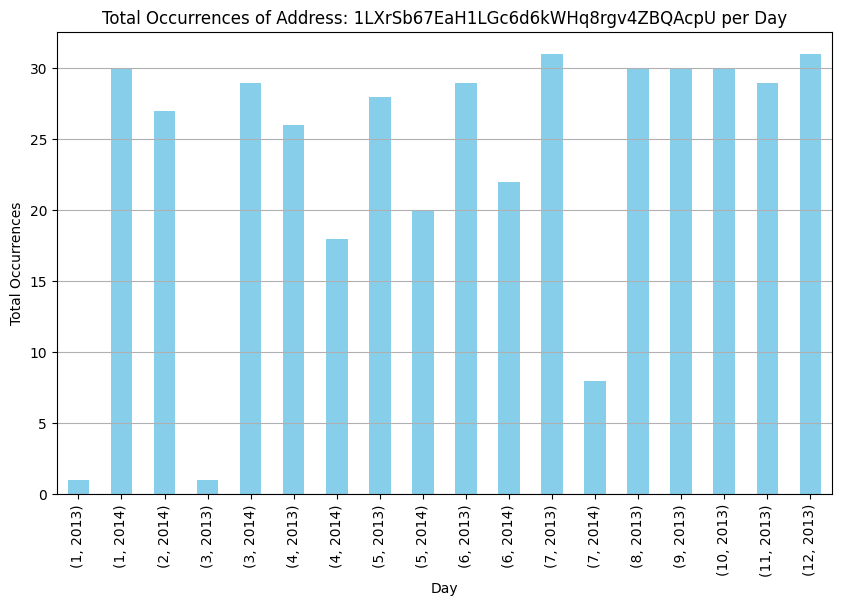

In [ ]:
one_address['month'] = pd.to_datetime(one_address['day'], unit='D', origin='2013-01-01').dt.month

# Calculate the total occurrences per day
occurrences_per_month = one_address.groupby(['month', 'year']).size()
# Plot the total occurrences per day in a bar graph
occurrences_per_month.plot(kind='bar', figsize=(10,6), color='skyblue')
plt.title(f'Total Occurrences of Address: {one_address["address"].iloc[0]} per Day')
plt.xlabel('Day')
plt.ylabel('Total Occurrences')
plt.grid(axis='y')
plt.show()


<ipython-input-23-9f795796aaa8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_address['date'] = pd.to_datetime(one_address['day'], format='%j')


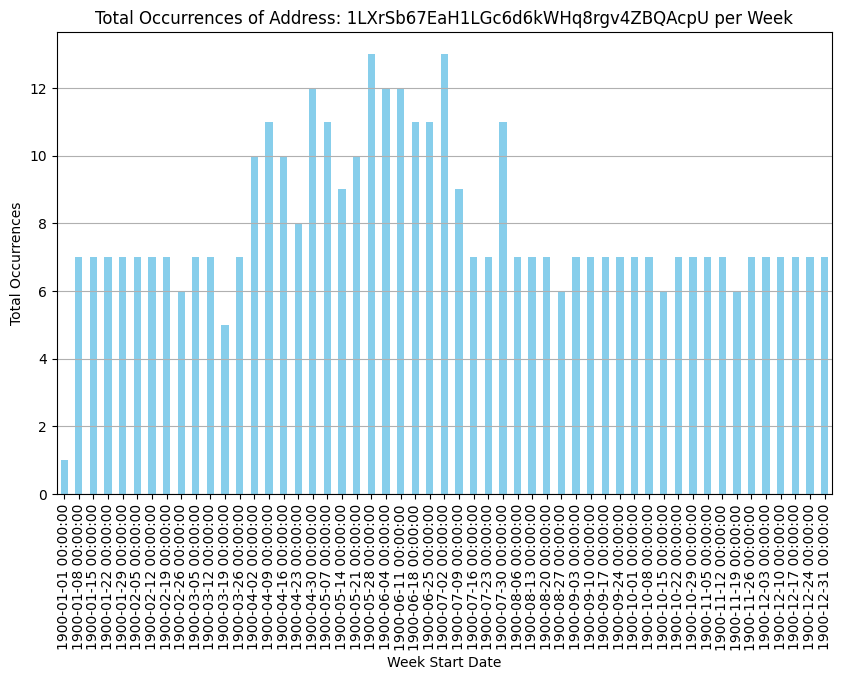

In [ ]:
# Convert the 'day' column to a datetime object
one_address['date'] = pd.to_datetime(one_address['day'], format='%j')

# Set 'date' as the index
one_address.set_index('date', inplace=True)

# Resample the data into weeks and calculate the total occurrences per week
occurrences_per_week = one_address.resample('W-Mon').size()

# Plot the total occurrences per week in a bar graph
occurrences_per_week.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title(f'Total Occurrences of Address: {one_address["address"].iloc[0]} per Week')
plt.xlabel('Week Start Date')
plt.ylabel('Total Occurrences')
plt.grid(axis='y')
plt.show()